# Проектная работа - Анализ бизнес-показателей

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Ход исследования**

 **1. Загрузим данные и подготовим их к анализу**
 
**2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии**

**3. Проведём исследовательский анализ данных**

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

 **4. Маркетинг**
 
Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**5. Оценим окупаемость рекламы для привлечения пользователей**

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

**6. Общий вывод**


**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):


- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` - страна пользователя

Таблица orders_log_short (информация о заказах):

- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

Таблица costs_short (информация о затратах на маркетинг):

- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

## Шаг 1. Загрузка, изучение и  подготовка данных к анализу

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy
from datetime import datetime, timedelta #импорт библиотеки datetime, timedelta
from matplotlib import pyplot as plt #импорт библиотеки matplotlib

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [3]:
display(visits.head()) #получение первых 5 строк таблицы visits
print()
display(visits.info()) #получение общей информации о данных в таблице visits
print()
visits.duplicated().sum() #проверяем дубликаты

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0

In [4]:
display(orders.head()) #получение первых 5 строк таблицы orders
print()
display(orders.info()) #получение общей информации о данных в таблице orders
print()
orders.duplicated().sum() #проверяем дубликаты

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0

In [5]:
display(costs.head()) #получение первых 5 строк таблицы costs
print()
display(costs.info()) #получение общей информации о данных в таблице costs
print()
costs.duplicated().sum() #проверяем дубликаты

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0

После первого ознакомления с данным видим, что пропусков и дубликатов нет. Для анализа есть все необходимые данные.
Осталось привести названия столбцов к нижнему регистру и преобразовать типы данных в столбцах с датой.

In [6]:
visits.columns = visits.columns.str.lower() #приводим названия столбцов к нижнему регистру 
orders.columns = orders.columns.str.lower() #приводим названия столбцов к нижнему регистру 
costs.columns = costs.columns.str.lower() #приводим названия столбцов к нижнему регистру
visits.rename(columns = {'user id':'user_id','session start' : 'session_start', 'session end' : 'session_end'}, inplace = True) 
orders.rename(columns = {'user id':'user_id', 'event dt' : 'event_dt'}, inplace = True) 

In [7]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

На первом этапе мы ознакомились с данными, проверили общую информацию, наличие дубликатов, также исправили наименования столбцов и преобразовали колонки с датой в нужный формат. Можем приступать анализу.

## Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

Добавим функцию для создания профиля пользователей get_profiles()

In [8]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

Добавим функцию для расчёта удержания get_retention

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Добавим функцию для расчёта  конверсии get_conversion

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Добавим функцию для расчёта LTV и ROI get_ltv

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Также добавим функции для визуалзации метрик plot_retention(), plot_conversion(), plot_ltv_roi() и filter_data().

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Получим профили пользователей. Вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу приложения Procrastinate Pro+.

In [16]:
profiles = get_profiles(visits, orders, costs) #получаем профили пользователей
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min()) #определяем минимальную дату привлечения пользователей
print()
print('Максимальная дата привлечения пользователей:' ,profiles['dt'].max())  # максимальная дата - момент анализа

Минимальная дата привлечения пользователей: 2019-05-01

Максимальная дата привлечения пользователей: 2019-10-27


In [18]:
min_analysis_date = profiles['dt'].min() #определяем минимальную дату привлечения пользователей 
observation_date = profiles['dt'].max()  # максимальная дата - момент анализа

Мы построили профили пользователей и выяснили минимальную и максимальные даты привлечения пользователей.

Далее выясним из каких стран приходят посетители и какие страны дают больше всего платящих пользователей.

In [19]:
def user_profiles(df, grouping):
    paying_users = df.groupby(grouping).agg({'user_id': 'count'})\
                .sort_values(by='user_id', ascending=False) \
                .rename(columns={'user_id': 'users'}) \
                .reset_index()   
    profile = df \
                .groupby(grouping) \
                .agg({'user_id': 'count', 'payer': 'sum'}) \
                .sort_values(by='payer', ascending=False) \
                .rename(columns={'user_id': 'users', 'payer': 'paying_users'}) \
                .reset_index()
    profile['%_paying_users'] = (profile['paying_users'] / paying_users['users'] * 100).round(2)
    
    return profile

In [20]:
countries = user_profiles(profiles, 'region')
devices = user_profiles(profiles, 'device')
channels = user_profiles(profiles, 'channel')

In [21]:
countries

,region,users,paying_users,%_paying_users
0,United States,100002,6902,6.90
1,UK,17575,700,3.98
2,France,17450,663,3.80
3,Germany,14981,616,4.11


Значительно больше пользователей из США, соответственно, и платящих пользователей больше именно в этом регионе. В остальных примерно на одном уровне.

Далее посмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [22]:
devices

,device,users,paying_users,%_paying_users
0,iPhone,54479,3382,6.21
1,Android,35032,2050,5.85
2,Mac,30042,1912,6.28
3,PC,30455,1537,5.12


Больше всего платящих пользователей iPhone, на втором месте пользователи Android.

Далее проверим источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [23]:
pay = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'}) \
                .sort_values(by='payer', ascending=False) \
                .rename(columns={'user_id': 'users', 'payer': 'paying_users'}) \
                .reset_index()
pay['%_paying_users'] = (pay['paying_users'] / pay['users'] * 100).round(2)
pay

,channel,users,paying_users,%_paying_users
0,FaceBoom,29144,3557,12.20
1,TipTop,19561,1878,9.60
2,organic,56439,1160,2.06
3,WahooNetBanner,8553,453,5.30
4,AdNonSense,3880,440,11.34
5,RocketSuperAds,4448,352,7.91
6,LeapBob,8553,262,3.06
7,OppleCreativeMedia,8605,233,2.71
8,lambdaMediaAds,2149,225,10.47
9,YRabbit,4312,165,3.83


Больше всего платящих пользоватей привлечены по каналам FaceBoom и TipTop. "Органических" пользователей больше всех по количеству, но доля платящих значительно меньше остальных. 

## Шаг 4. Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Посчитаем сколько всего потратили денег на маркетинг.

In [24]:
print('Общая сумма расходов на маркетинг:', profiles['acquisition_cost'].sum()) #всего потратили 

Общая сумма расходов на маркетинг: 105497.29999999999


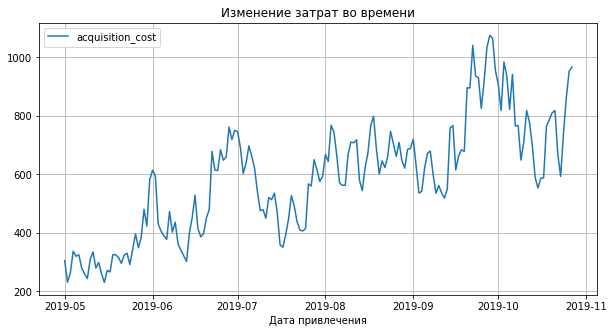

In [25]:
profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.xlabel('Дата привлечения')
plt.title('Изменение затрат во времени')
plt.show()

Далее посмотрим в разбивке по каждому источнику.

In [26]:
channel_cost = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).to_frame().reset_index()
channel_cost

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


Посмотрим еще процент затрат для каждого канала от общей суммы.

In [27]:
def channel_costs(df, grouping):
    channel_c = df['acquisition_cost'].sum()
    
    profile = df \
                .groupby(grouping) \
                .agg({'acquisition_cost': 'sum'}) \
                .sort_values(by='acquisition_cost', ascending=False) \
                .reset_index()
    profile['%_costs'] = (profile['acquisition_cost'] / channel_c * 100).round(2)
    
    return profile

In [28]:
channels = channel_costs(profiles, 'channel')
channels

,channel,acquisition_cost,%_costs
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


По данным видим, что больше всего потратили денег на маркетинг по двум источникам TipTop и FaceBoom, на остальные расходов приходится значительно меньше.  Также примечательно, что на канал TipTop потратили больше половины всех затрат на маркетинг. 

Далее рассмотрим расходы в разбивке по времени. 

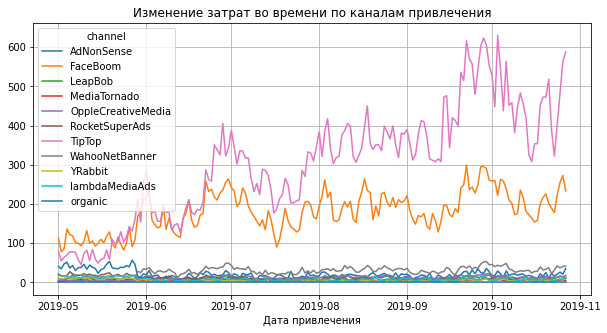

In [29]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.xlabel('Дата привлечения')
plt.title('Изменение затрат во времени по каналам привлечения')
plt.show()

Видим достаточно резкое повышение расходов в июне 2019 года по двум источникам TipTop и FaceBoom. Расходы по остальным источникам стабильные.

Посмотрим, сколько в среднем стоило привлечение одного покупателя из каждого источника, предварительно уберем из анализа "органических" пользователей, так как за их привлечение мы не платим.

In [30]:
profiles = profiles.query('channel != "organic"')

In [31]:
one_user_cost = profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).to_frame().reset_index()
one_user_cost

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


In [32]:
profiles['acquisition_cost'].mean() # средний CAC на одного пользователя для всего проекта

1.1274813239427588

В результате видим, что на привлечение новых пользователей по каналу TipTop бизнес тратит много денег, возможно, именно из-за этого компания терпит убытки, если расходы по этому каналу не окупаются. 

## Шаг 5. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

### Проанализируем общую окупаемость рекламы

На основании описания задачи зададим горизонт анализа 14 дней.

In [33]:
horizon_days = 14

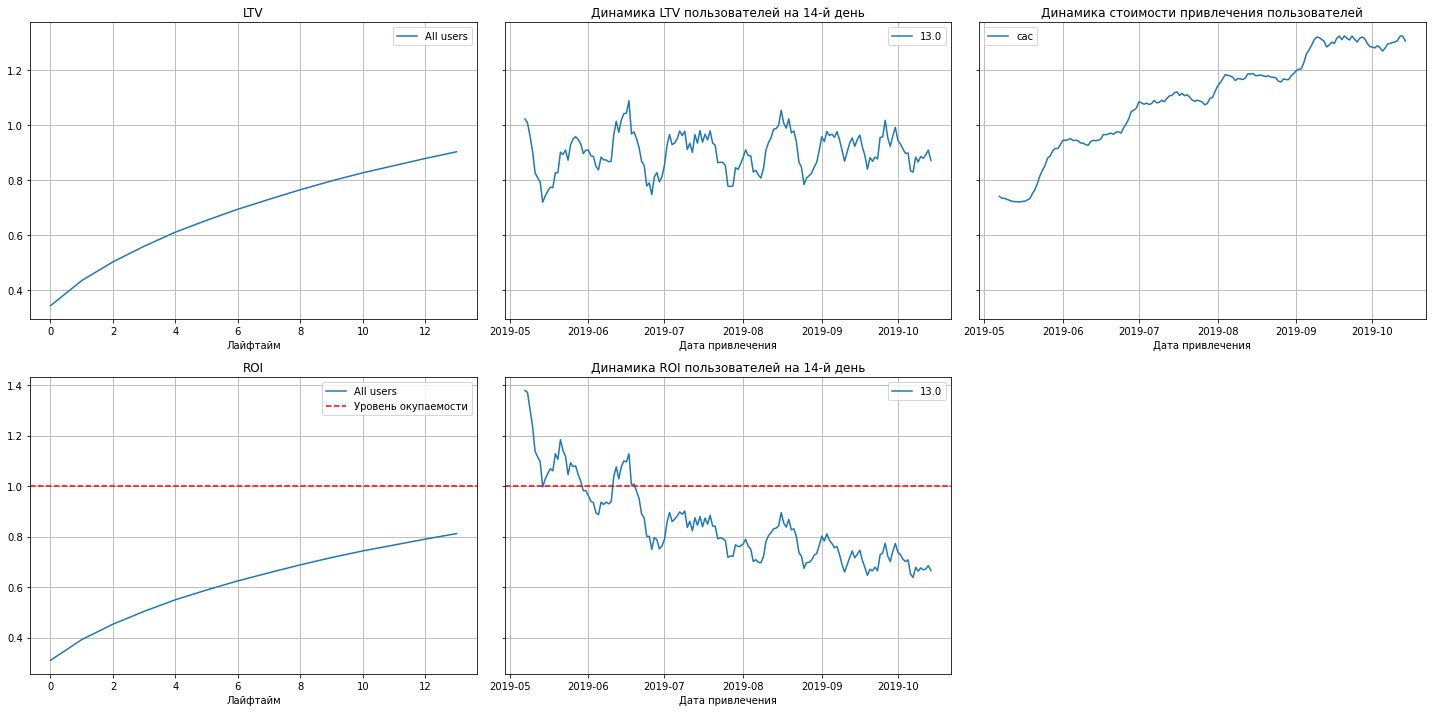

In [34]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можем сделать слудующие выводы:
- Реклама не окупается. ROI достигает примерно 80%
- САС стремительно увеличивается, что мы и выяснили на предыдущем шаге
- ROI в динамике постепенно падает с июля, и последние три месяца находится на низком уровне.


Далее будем выяснять причины почему реклама не окупается.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

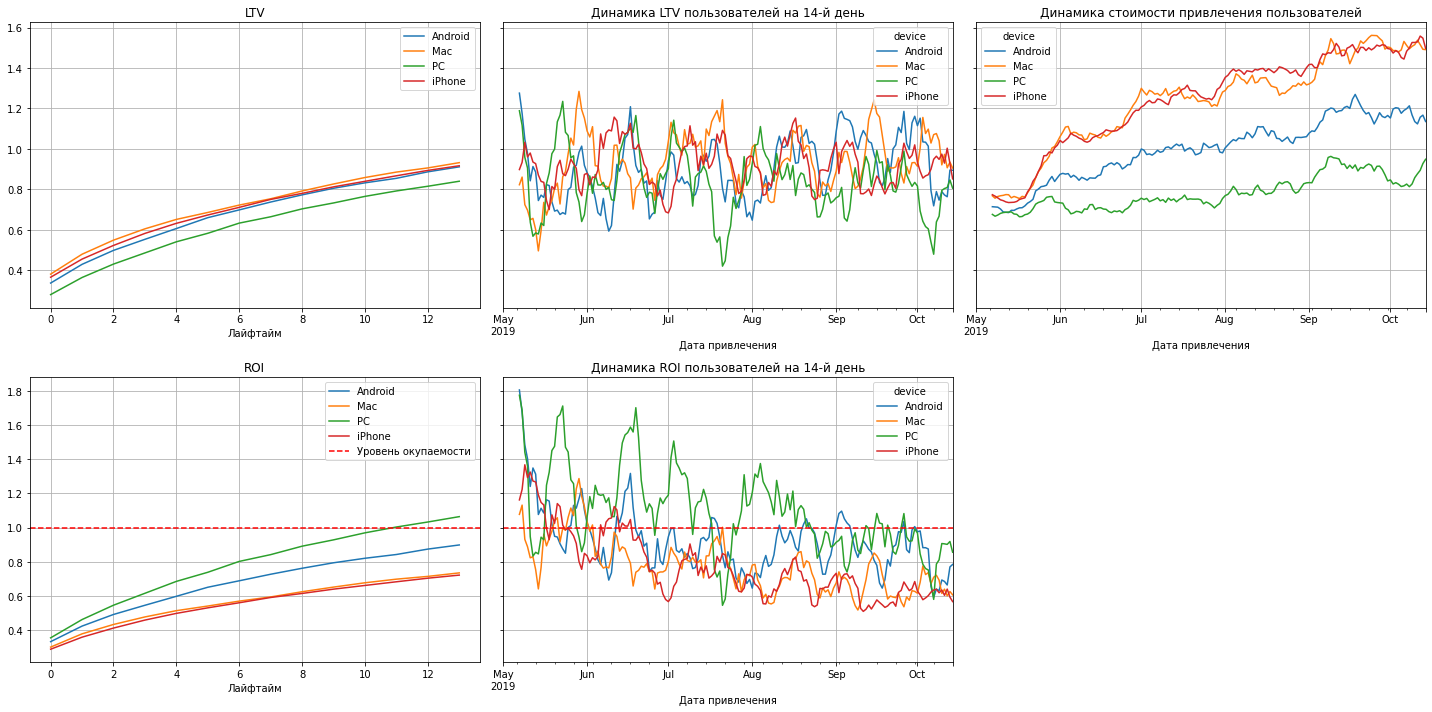

In [35]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

Больше всего денег тратится на привлечение пользователей с устройствами Mac и iPhone, на пользователей РС уходит меньше всего средств, за счет этого они и приносят большую  прибыль. 

### Проанализируем окупаемость рекламы с разбивкой по странам

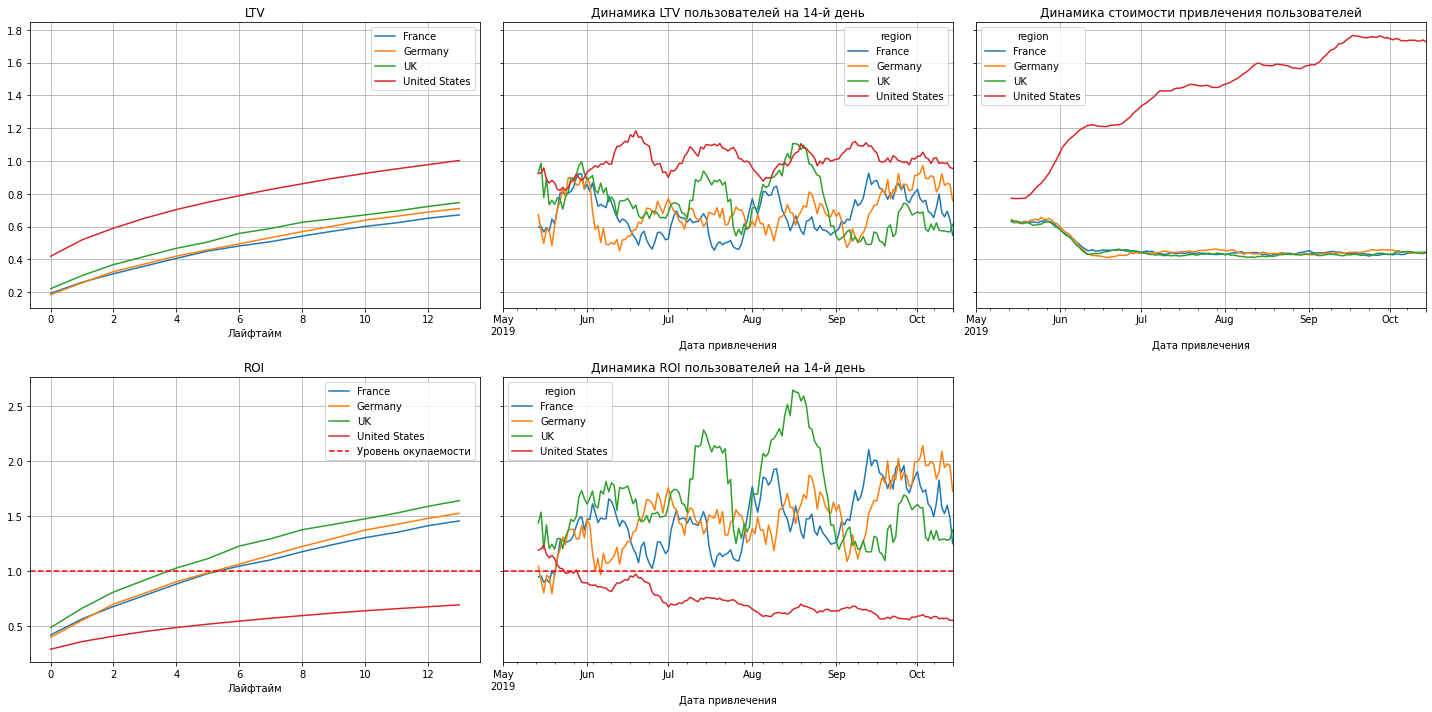

In [36]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можем сделать слудующие выводы:
- Лучше всего окупается UK
- Не окупается реклама для пользователей из США
- САС для пользователей из США значительно выше, чем для остальных стран
- В целом пользователи США приносят большую выгоду, чем пользователи других стран, но за счет крайне больших затрат на рекламу расходы не окупаются. 

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

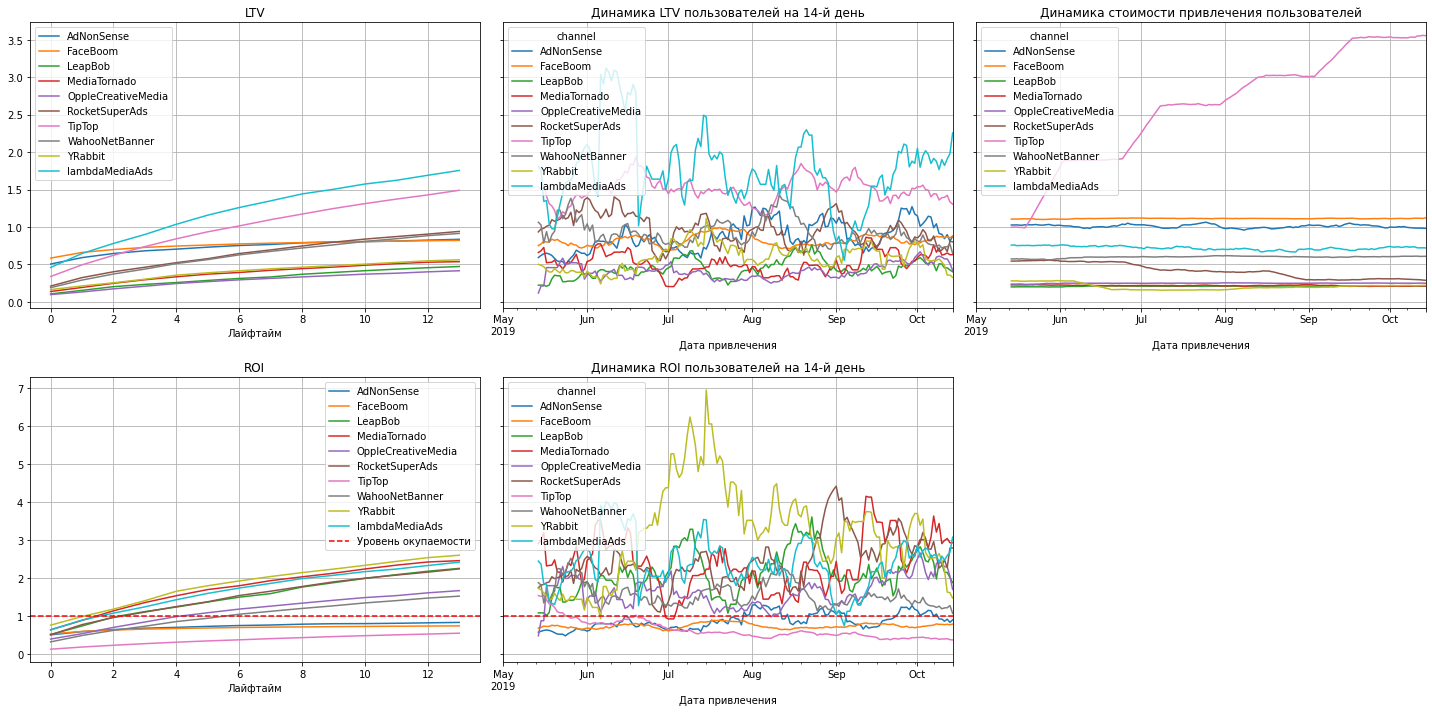

In [37]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Большинство каналов окупаются. Видим, что не окупаются каналы TipTop, FaceBoom и AdNonSense. На канал TipTop было потрачено в разы больше средств на привлечение. Также обратим внимание, что стоимость привлечения пользователей по каналу FaceBoom за весь рассматриваемый период стабильно одинаковая. 

Самым прибыльным каналом является lambdaMediaAds, а лучше всего окупается YRabbit, за счет минимальных денежных вложений в рекламу. 

### Построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Далее построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Проверим:
- Окупается ли реклама в целом?
- Какие устройства, страны и каналы могут снижать окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

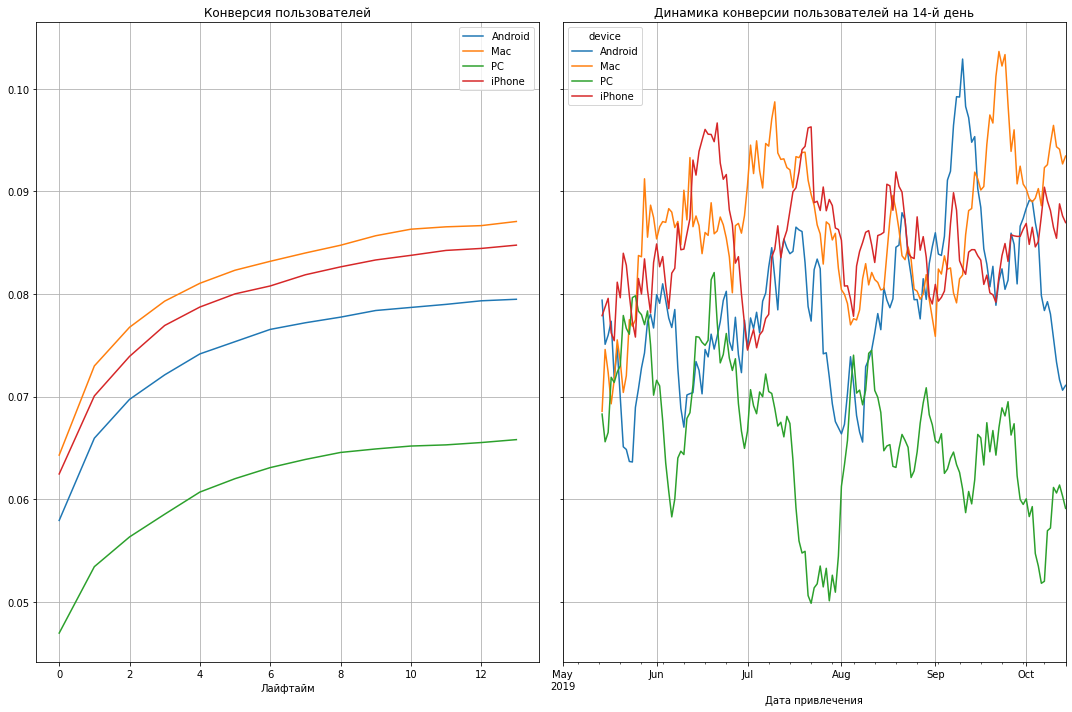

In [38]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

По графику видим, что конвертируются лучше всего пользователи Mac и iPhone. Хуже всего - пользователи РС.

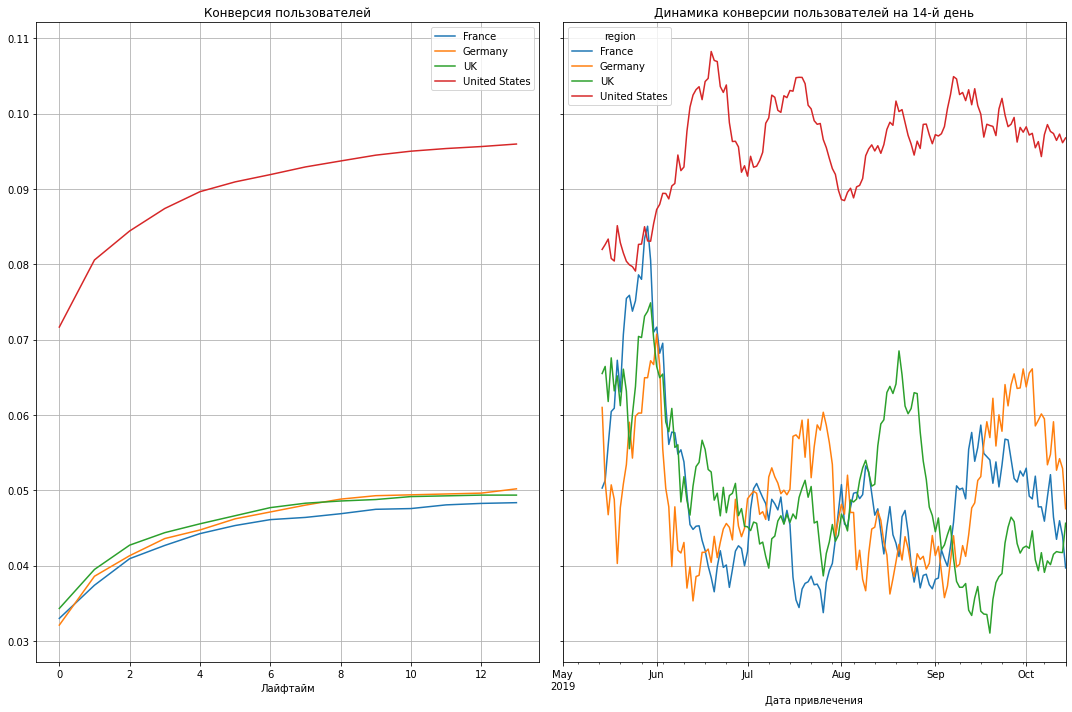

In [39]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Значительно лучше конвертируются пользователи из США, пользователи из других стран примерно на одном уровне.

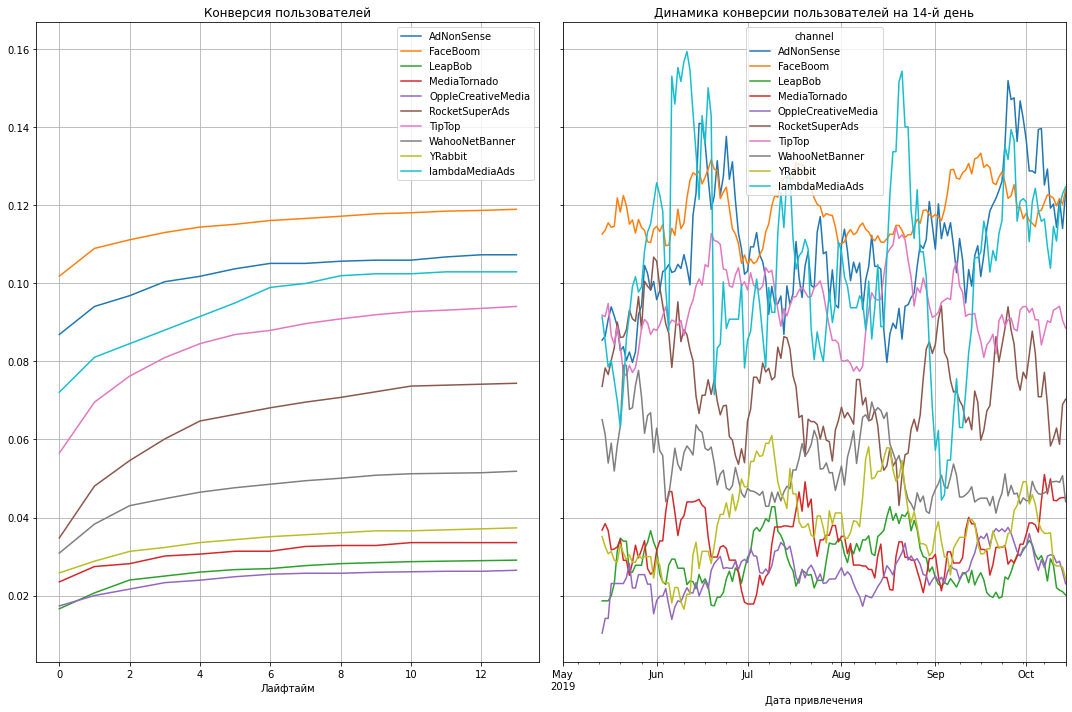

In [40]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Лучше всего конвертируются пользователи, привлеченные по каналу AdNonSense и FaceBoom, из предыдущего анализа мы увидели, что на привлечение этих пользователей тратится стабильно фиксированная сумма. 

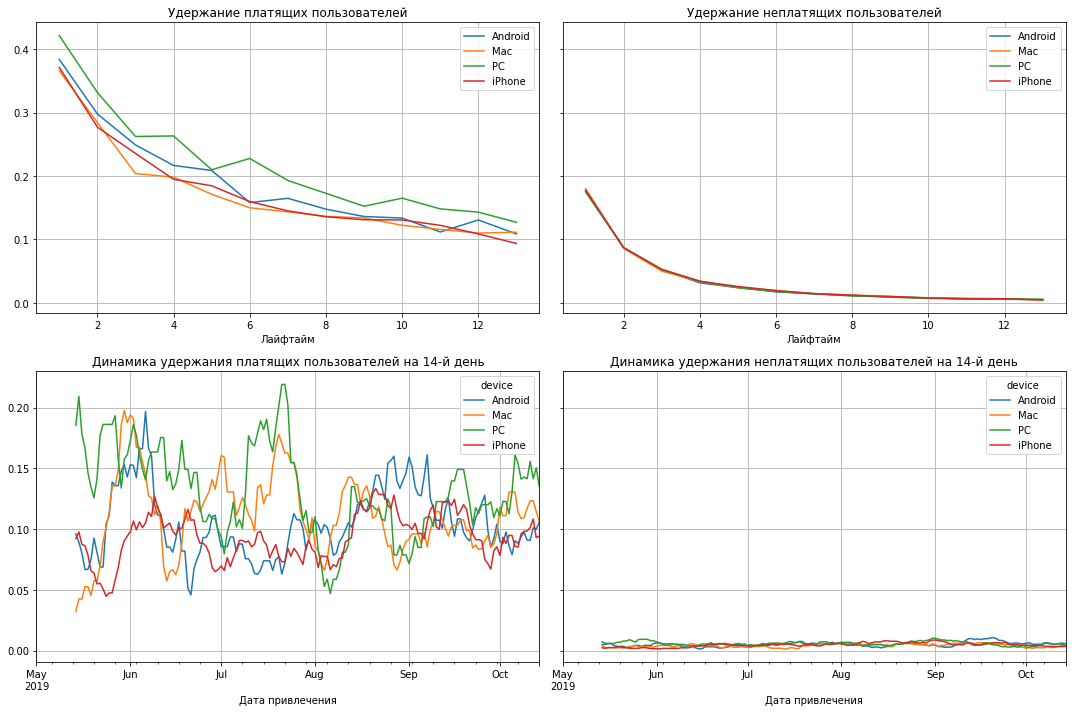

In [41]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

Каких-то явных зацепок на графике удержания пользователей не обнаруживаем. В целом пользователи РС несколько лучше удерживаются.

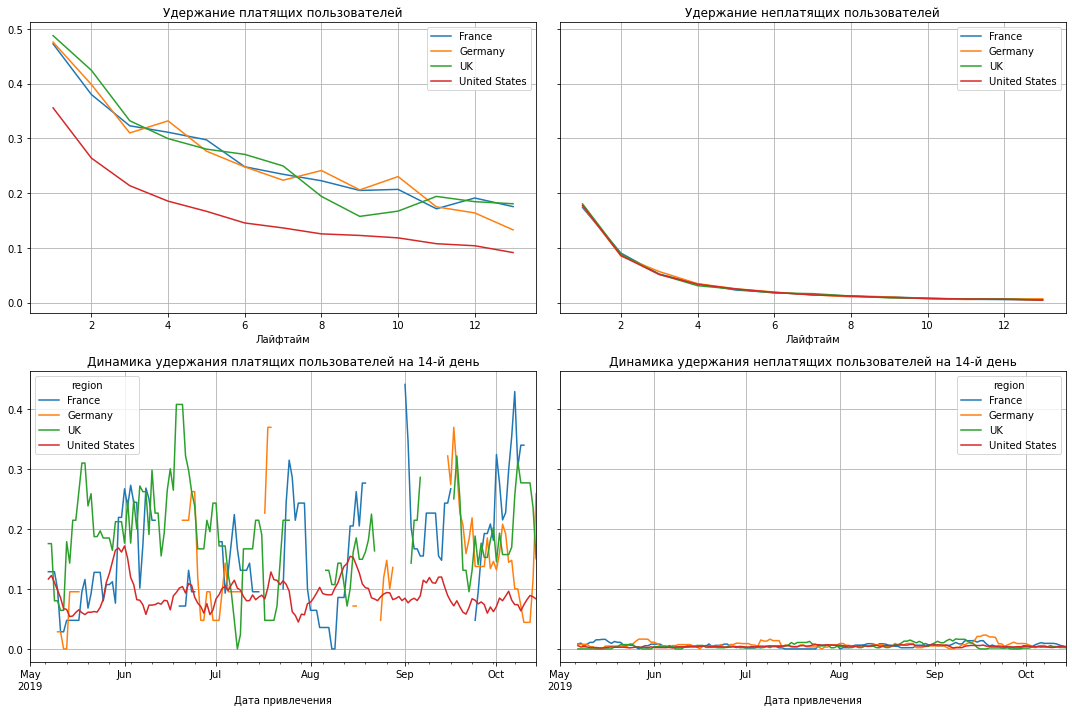

In [42]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7) 

Здесь уже видимим явный "провал" в удержании пользователей из США, в то время как пользователи остальных стран примерно на одном уровне.

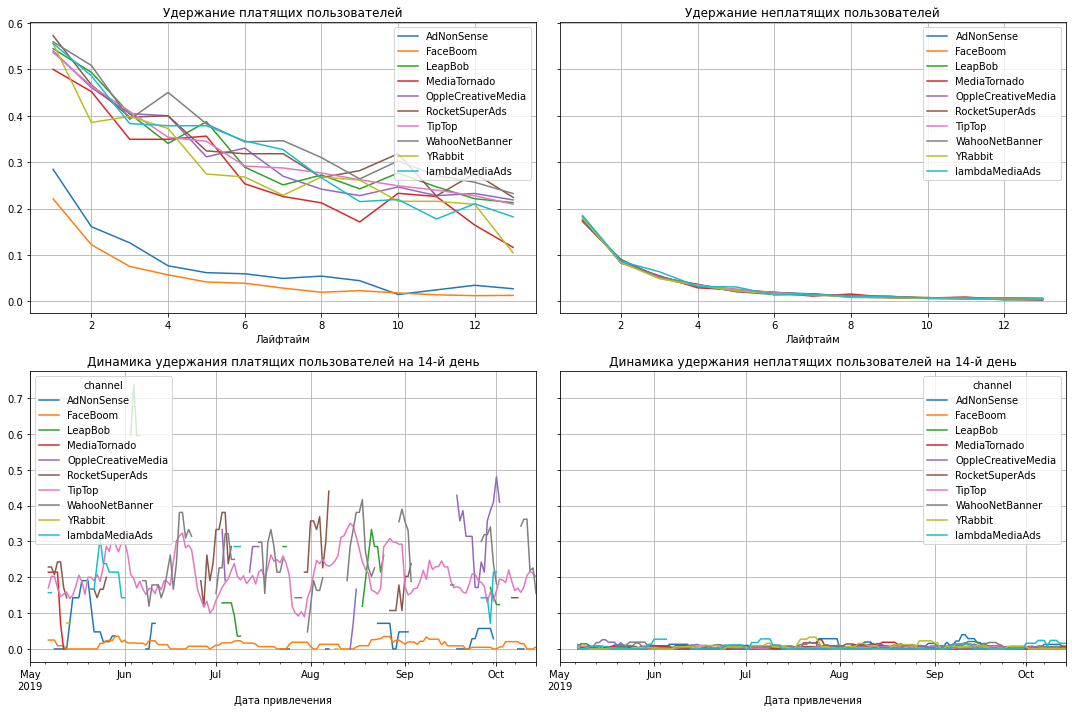

In [43]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7) 

Пользователи, привлеченные по каналам AdNonSense и FaceBoom гораздо меньше удерживаются, чем пользователи других каналов. 

Можем сделать вывод, что реклама в целом не окупается, ROI достигает только 80% на 14-й день. На окупаемость рекламы влияют пользователи из США, также мы выявили, что на привлечение пользователей по каналу TipTop тратятся большие деньги, но прибыли это не приносит. Привлеченные пользователи с устройствами Mac и iPhone не окупаются, хотя лучше всего конвертируются.



Рассмотрим ситуацию с рекламой в США подробнее.

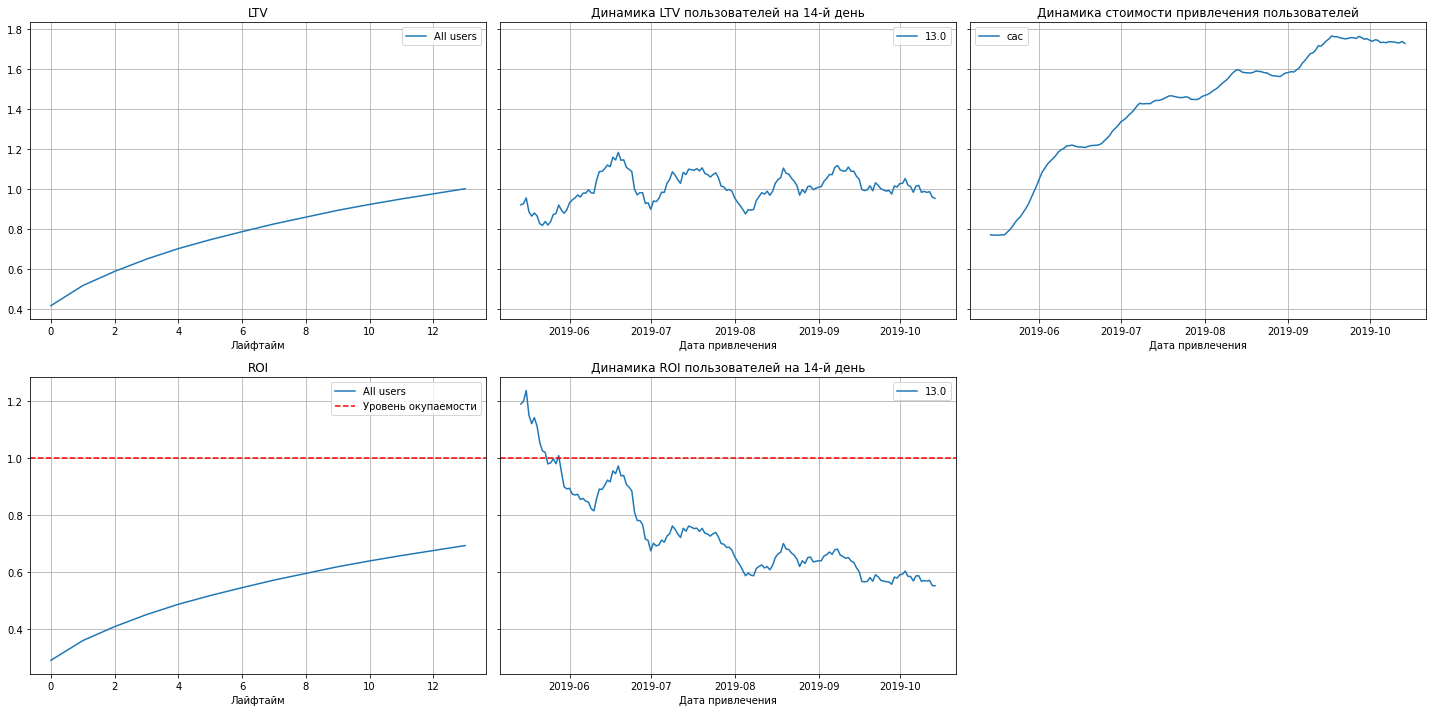

In [44]:
profiles_usa = profiles.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

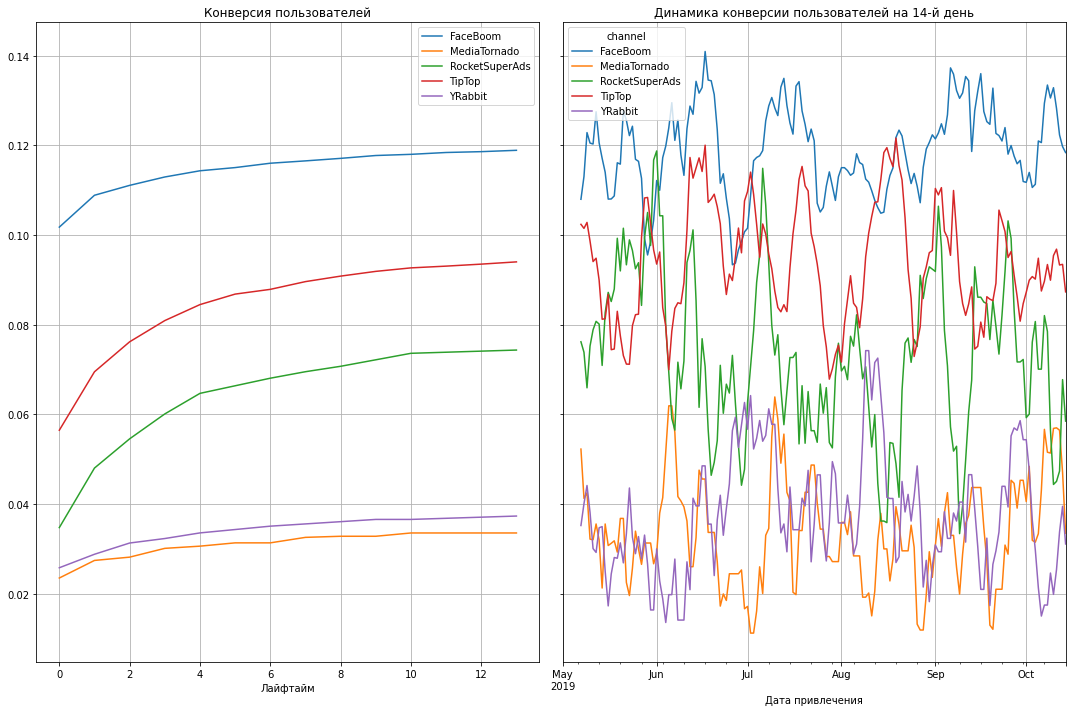

In [45]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

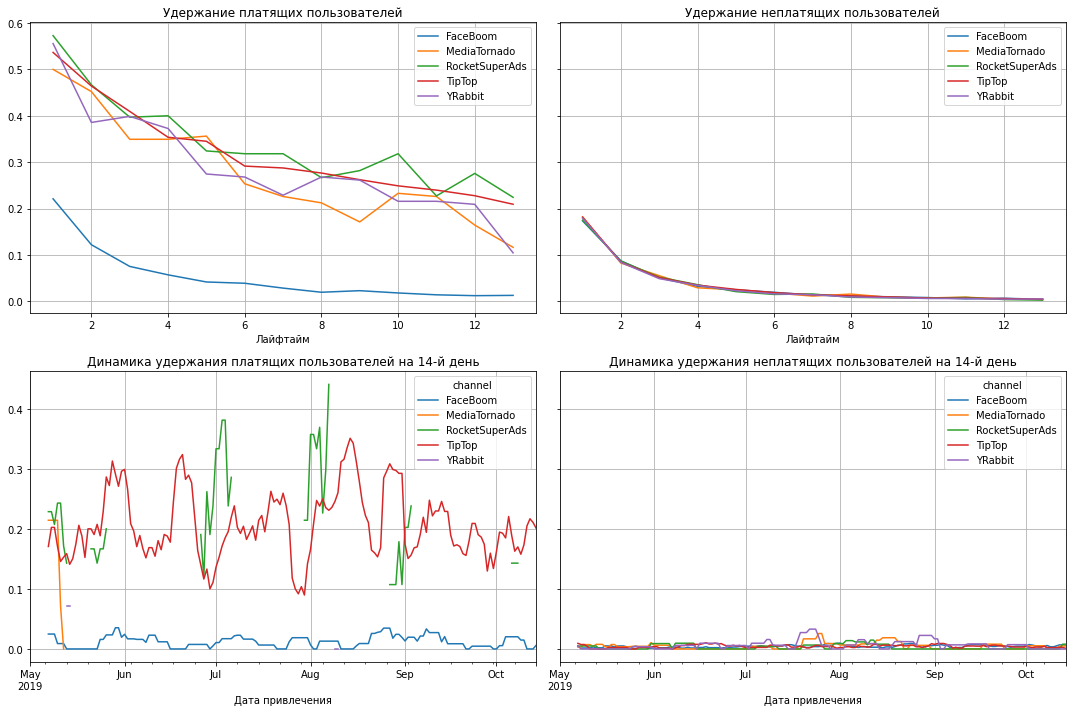

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Видим, что реклама в США совершенно не окупается, ROI достигает примерно 70% на 14-й день. Неоходимо обратить внимание на канал FaceBoom,пользователи которого хорошо конвертируются, но плохо удерживаются, и выяснить причину. 

Чем могут быть вызваны проблемы окупаемости? 
- На канал TipTop тратится большое количество средств, но они не окупаются. Это может быть связано с возрастом пользователей данного канала и их платежеспособностью. Стоит проанализировать целевую аудиторию, возможно, реклама настроена неверно. 
- В США высокая конверсия, но низкое удержание и окупаемость. Нужно детально проанализировать с чем это может быть связано, возможно, условия покупок, цена подписки и т.д. отличаются от условий для пользователей других стан. 
- Каналы AdNonSense и FaceBoom имеют высокую конверсию, но низкое удержание, что негативно влияет на окупаемость.

## Шаг 6. Общий вывод
- Выделите причины неэффективности привлечения пользователей;
   - Большие инвестиции в рекламу для каналав TipTop, которые себя не оправдывают. 
   - В целом, каналы TipTop, FaceBoom и AdNonSense не окупаются.

- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.
   - Обратить внимание на другие каналы, так как самые популярные - TipTop и FaceBoom совсем не окупаются, насмотря на большое количество пользователей. В перспективе другие каналы могут принести больше платящих пользователей, например на каналы lambdaMediaAds и YRabbit.
   - Проанализировать целевую аудиторию США.
   - Уделить больше внимания инвестициям в остальные страны, кроме США. 
   - Перераспределить инвестиции на рекламу FaceBoom и TipTop для США, можно обратить внимание на канал RocketSuperAds.